In [1]:
import numpy as np
import ps_utils
import numpy.linalg as la
import matplotlib.pyplot as plt

In [13]:
# read Beethoven data
I, mask, S = ps_utils.read_data_file('face')

# get indices of non zero pixels in mask
nz = np.where(mask > 0)
m,n = mask.shape

# for each mask pixel, collect image data
n_points = len(S)
J = np.zeros((n_points, len(nz[0])))
for i in range(n_points):
    Ii = I[:,:,i]
    J[i,:] = Ii[nz]

In [14]:
from typing import Literal

method: Literal['ransac', 'inverse', 'pseudo'] = 'ransac'

if method == 'ransac':
    M_list = []
    for i in range(J.shape[1]):
        J_i = J[:, i:i+1]
        mi, _, _ = ps_utils.ransac_3dvector((J_i, S), 10, verbose=0)
        M_list.append(mi)

    M = np.hstack(M_list)
elif method == 'inverse':
    iS = la.inv(S)
    M = np.dot(iS, J)
else:
    iS = la.pinv(S)
    M = np.dot(iS, J)


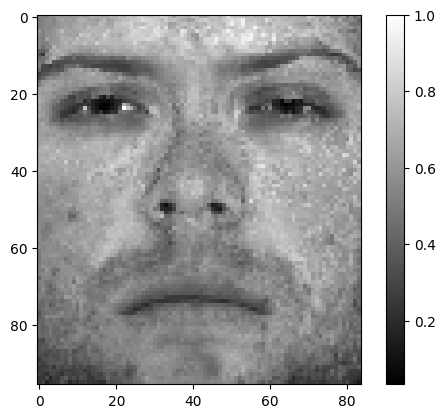

In [16]:
# get albedo as norm of M and normalize M
Rho = la.norm(M, axis=0)

# Plot the albedo
rho_image = np.zeros((m,n))
rho_image[nz] = Rho / np.max(Rho)

# Normalize the albedo to be between 0 and 1
rho_image = rho_image / np.max(rho_image)

plt.imshow(rho_image, cmap='gray')
plt.colorbar()
plt.show()

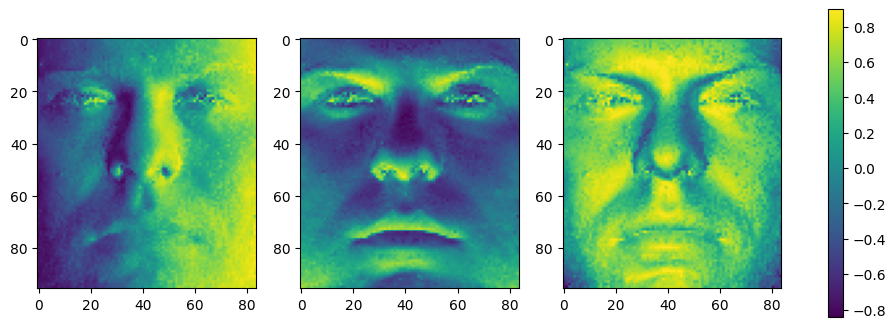

In [17]:
N = M/np.tile(Rho, (3,1))

n1 = np.zeros((m,n))
n2 = np.zeros((m,n))
n3 = np.ones((m,n))
n1[nz] = N[0,:]
n2[nz] = N[1,:]
n3[nz] = N[2,:]

_,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(12,4))
im1 = ax1.imshow(n1)
im2 = ax2.imshow(n2) 
im3 = ax3.imshow(n3)
plt.colorbar(im1, ax=[ax1,ax2,ax3])
plt.show()

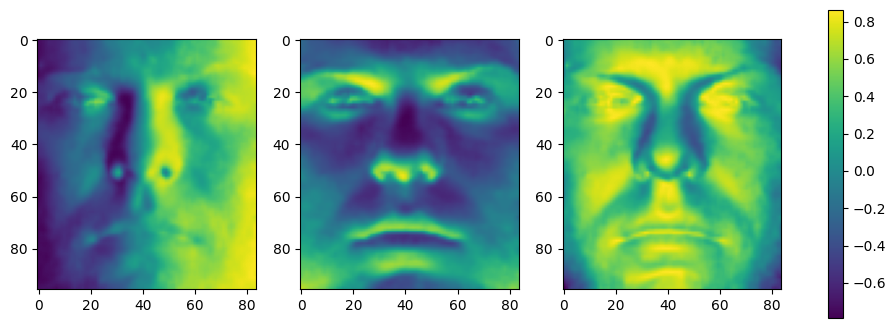

In [21]:
n1 = np.zeros((m,n))
n2 = np.zeros((m,n))
n3 = np.ones((m,n))
n1[nz] = N[0,:]
n2[nz] = N[1,:]
n3[nz] = N[2,:]

n1, n2, n3 = ps_utils.smooth_normal_field(n1, n2, n3, mask, iters=10)
_,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(12,4))
im1 = ax1.imshow(n1)
im2 = ax2.imshow(n2) 
im3 = ax3.imshow(n3)
plt.colorbar(im1, ax=[ax1,ax2,ax3])
plt.show()